## 1.Déploiement de l’environnement

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## 2.Sources de données : Manipulation

In [367]:
immo = pd.read_csv('credit_immo.csv')

In [368]:
immo.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


In [369]:
immo.shape

(19, 10)

In [370]:
a = np.random.randn(6,4)
index = [0, 1, 4, 5, 7, 8]
data = pd.DataFrame(data=a,index=index, columns=['taux_de_ventes', 'croissance_vente','ratio_benefice','ratio_perte'])
data

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-1.254152,0.767549,1.663160,-0.232985
1,0.851705,-1.375513,0.655767,1.398456
4,-0.821433,0.222605,0.459459,-1.265544
5,0.728276,-1.643180,0.378378,0.396412
7,0.754441,0.329328,1.109783,-0.220568
8,-0.243105,0.418268,-0.401069,-0.500946


In [371]:
nvx_index = [i for i in range(6)]
data = data.reindex(nvx_index)#fill_values = 0
data

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-1.254152,0.767549,1.663160,-0.232985
1,0.851705,-1.375513,0.655767,1.398456
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,-0.821433,0.222605,0.459459,-1.265544
5,0.728276,-1.643180,0.378378,0.396412


In [372]:
data = data.fillna(0)
data

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-1.254152,0.767549,1.663160,-0.232985
1,0.851705,-1.375513,0.655767,1.398456
2,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000
4,-0.821433,0.222605,0.459459,-1.265544
5,0.728276,-1.643180,0.378378,0.396412


In [373]:
data = data.drop(index=[2,3])
data

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-1.254152,0.767549,1.663160,-0.232985
1,0.851705,-1.375513,0.655767,1.398456
4,-0.821433,0.222605,0.459459,-1.265544
5,0.728276,-1.643180,0.378378,0.396412


## 3.Traitement des données :

In [374]:
immo.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


In [375]:
immo = immo.drop(['ID_NOM'], axis=1)
immo.shape

(19, 9)

In [376]:
X = immo.iloc[:,0:8].values
Y = immo.iloc[:,-1].values
Y = Y.reshape(Y.shape[0],1)
print(X.shape)
print(Y.shape)

(19, 8)
(19, 1)


In [377]:
imptr=SimpleImputer(missing_values=np.nan, strategy='mean')

imptr.fit(X[:,0:1])
X[:,0:1] = imptr.transform(X[:,0:1])
#print(X[:,0:1])
imptr.fit(X[:,7:8])
X[:,7:8] = imptr.transform(X[:,7:8])
print(X[:,7:8])

[[3.0]
 [0.0]
 [0.0]
 [1.3333333333333333]
 [2.0]
 [4.0]
 [0.0]
 [0.0]
 [1.0]
 [2.0]
 [3.0]
 [0.0]
 [1.0]
 [2.0]
 [0.0]
 [0.0]
 [3.0]
 [1.0]
 [2.0]]


In [379]:
LabEnc_X = LabelEncoder()

X[:,2]=LabEnc_X.fit_transform(X[:,2])
X[:,5]=LabEnc_X.fit_transform(X[:,5])
Y = LabEnc_X.fit_transform(Y)
print(f"X[:,2] : {X[:,2]}")
print(f"X[:,5] : {X[:,5]}")
print(f"Y : {Y}")

X[:,2] : [1 1 1 0 0 3 1 3 1 1 1 0 3 1 0 2 1 1 1]
X[:,5] : [1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1]
Y : [1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1]


In [380]:
X_app, X_test, Y_app, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


Y_app = Y_app.reshape(Y_app.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)

print(Y_app.shape)
print(Y_test.shape)

(15, 1)
(4, 1)


In [381]:
scaler = StandardScaler()

X_app = scaler.fit_transform(X_app)
X_test = scaler.fit_transform(X_test)

print(X_app)

[[ 0.          2.57921231 -1.14763808  0.02170312  0.08769157 -1.22474487
   1.17953565 -1.00119119]
 [ 2.56173769  0.62031688 -0.19127301  1.60422225 -0.26996286  0.81649658
  -1.03209369  1.32916761]
 [-0.73192505 -0.76723404 -0.19127301  0.24777728 -0.46865977 -1.22474487
  -1.03209369 -1.00119119]
 [-0.36596253 -0.44075147 -1.14763808 -0.79216386 -0.46865977 -1.22474487
  -0.29488391  0.55238134]
 [-0.36596253  1.35490267 -0.19127301 -0.74694903  1.00169734 -1.22474487
  -1.03209369 -1.00119119]
 [-0.36596253  0.21221367  1.72145713 -0.20437104 -0.54813854  0.81649658
  -1.03209369  2.10595387]
 [-0.36596253 -0.60399276 -0.19127301 -0.06872655  3.38606023  0.81649658
   0.44232587  0.55238134]
 [ 0.73192505 -0.1142689  -0.19127301  0.05787499 -0.50839915  0.81649658
   0.44232587  0.55238134]
 [-1.46385011 -1.17533725  1.72145713 -0.7017342  -0.38918101 -1.22474487
  -1.03209369 -1.00119119]
 [ 0.73192505 -1.2569579  -0.19127301  2.5085189  -0.58787792  0.81649658
   1.17953565 -0.

## 4.Visualisation de données

In [382]:
df_montant = pd.read_csv('Montant_Temps.csv')

In [383]:
df_montant.head()

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9


In [384]:
df_montant.shape

(45, 2)

In [385]:
x = df_montant.iloc[:,1].values
y = df_montant.iloc[:,0].values

x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)
print(x.shape)
print(y.shape)

(45, 1)
(45, 1)


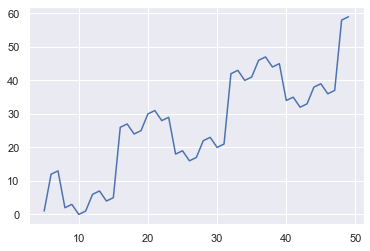

In [386]:
plt.plot(x,y)
plt.show()

## 4.1 Rajoutez du style à vos graphiques:

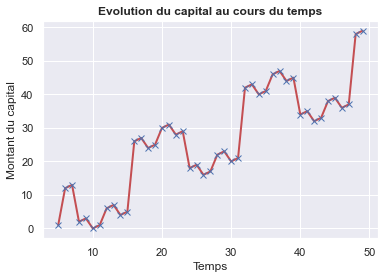

In [387]:
plt.plot(x, y, '-r', linewidth=2)
plt.plot(x, y, 'xb')
plt.xlabel('Temps')
plt.ylabel('Montant du capital')
plt.title('Evolution du capital au cours du temps', fontdict={'weight':'bold'})
plt.grid(True)
plt.show()

## 4.2 Visualisation de données sous forme de nuage de points

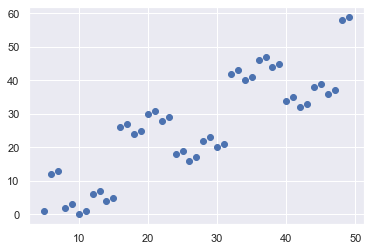

In [388]:
plt.scatter(x,y)
plt.show()

## 5.Analyse de données

### 5.1 Mesure de tendance centrale

In [389]:
df_tendance = pd.read_csv('tendance_centrale.csv')

In [390]:
df_tendance.head()

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50


In [391]:
print(df_tendance.shape)

(17, 3)


In [392]:
df_tendance.describe()

,Age,Rating
count,17.000000,17.000000
mean,45.647059,4.438824
std,10.723462,0.800390
min,30.000000,3.500000
25%,34.000000,3.800000
50%,49.000000,4.300000
75%,53.000000,4.800000
max,59.000000,5.980000


In [393]:
df_tendance.mean()

Age       45.647059
Rating     4.438824
dtype: float64

In [394]:
df_tendance.median()

Age       49.0
Rating     4.3
dtype: float64

In [395]:
df_tendance['Age'].mode()

0    53
dtype: int64

In [396]:
df_tendance['Rating'].mode()

0    3.78
1    3.95
2    4.30
3    4.80
4    5.98
dtype: float64

### 5.2 Analyse de la variance :

In [397]:
df_tendance.var()

Age       114.992647
Rating      0.640624
dtype: float64

### 5.3 Analyse de corrélations :

In [398]:
df_iris = pd.read_csv('iris.csv')

In [399]:
df_iris.head()

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espèce
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [400]:
df_iris.shape

(150, 5)

In [401]:
df_iris.describe()

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [402]:
df_iris.corr()

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal
longueur_sepal,1.000000,-0.117570,0.871754,0.817941
largeur_sepal,-0.117570,1.000000,-0.428440,-0.366126
longueur_petal,0.871754,-0.428440,1.000000,0.962865
largeur_petal,0.817941,-0.366126,0.962865,1.000000


**5.3.1 Analyse graphique :**

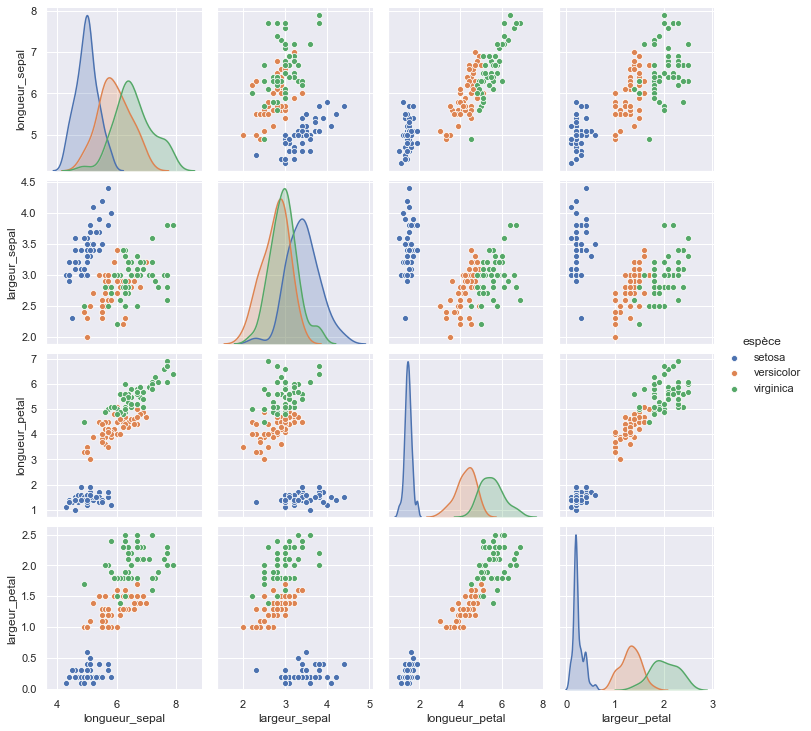

In [403]:
import seaborn as sns
sns.set()
sns.pairplot(df_iris, hue='espèce')

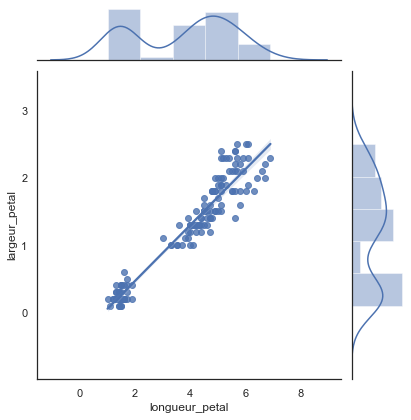

In [404]:
with sns.axes_style('white'):
    sns.jointplot("longueur_petal", "largeur_petal", data=df_iris, kind='reg')

In [405]:
X_iris = df_iris.iloc[:,:3].values
Y_iris = df_iris.iloc[:,-1].values

print(X_iris.shape)
print(Y_iris.shape)

(150, 3)
(150,)


In [406]:
LabEnc_Y = LabelEncoder()
Y_iris = LabEnc_Y.fit_transform(Y_iris)
Y_iris = Y_iris.reshape(Y_iris.shape[0],1)
Y_iris.shape

#Y_iris = 0 = 'setosa'
#Y_iris = 2 = 'versicolor'
#Y_iris = 2 = 'virginica'

(150, 1)

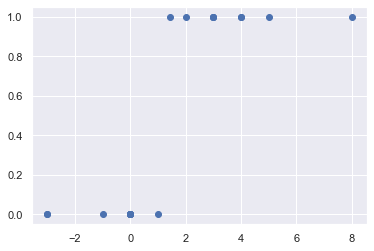

In [407]:
plt.scatter(X[:,0], Y)

#X[:,0] = longueur_sepal

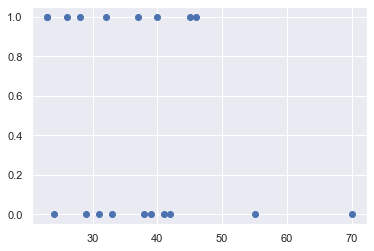

In [408]:
plt.scatter(X[:,1], Y)

#X[:,0] = largeur_sepal

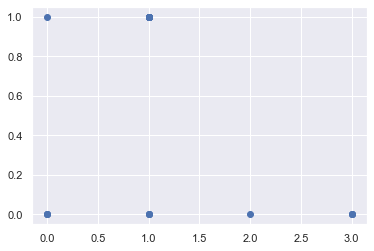

In [409]:
plt.scatter(X[:,2], Y)

#X[:,0] = longueur_petal

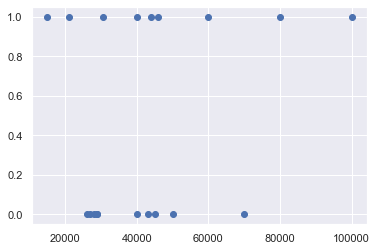

In [410]:
plt.scatter(X[:,3], Y)

#X[:,0] = largeur_petal

**5.3.1 Analyse mathématique :**